In [16]:
%run "simulation_function.ipynb"

In [32]:
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
import pandas as pd

%config InlineBackend.figure_format = 'svg'

In [27]:
numcores = multiprocessing.cpu_count()
numcores

8

In [28]:
I0Es =  np.linspace(0, 3, 45) #
I0Es = 5*[round(I0Es[i],3) for i in range(len(I0Es))]
I0Es

[0.0,
 0.068,
 0.136,
 0.205,
 0.273,
 0.341,
 0.409,
 0.477,
 0.545,
 0.614,
 0.682,
 0.75,
 0.818,
 0.886,
 0.955,
 1.023,
 1.091,
 1.159,
 1.227,
 1.295,
 1.364,
 1.432,
 1.5,
 1.568,
 1.636,
 1.705,
 1.773,
 1.841,
 1.909,
 1.977,
 2.045,
 2.114,
 2.182,
 2.25,
 2.318,
 2.386,
 2.455,
 2.523,
 2.591,
 2.659,
 2.727,
 2.795,
 2.864,
 2.932,
 3.0,
 0.0,
 0.068,
 0.136,
 0.205,
 0.273,
 0.341,
 0.409,
 0.477,
 0.545,
 0.614,
 0.682,
 0.75,
 0.818,
 0.886,
 0.955,
 1.023,
 1.091,
 1.159,
 1.227,
 1.295,
 1.364,
 1.432,
 1.5,
 1.568,
 1.636,
 1.705,
 1.773,
 1.841,
 1.909,
 1.977,
 2.045,
 2.114,
 2.182,
 2.25,
 2.318,
 2.386,
 2.455,
 2.523,
 2.591,
 2.659,
 2.727,
 2.795,
 2.864,
 2.932,
 3.0,
 0.0,
 0.068,
 0.136,
 0.205,
 0.273,
 0.341,
 0.409,
 0.477,
 0.545,
 0.614,
 0.682,
 0.75,
 0.818,
 0.886,
 0.955,
 1.023,
 1.091,
 1.159,
 1.227,
 1.295,
 1.364,
 1.432,
 1.5,
 1.568,
 1.636,
 1.705,
 1.773,
 1.841,
 1.909,
 1.977,
 2.045,
 2.114,
 2.182,
 2.25,
 2.318,
 2.386,
 2.455,
 2.523

In [29]:
outputs_bump = Parallel(n_jobs = numcores)(delayed(simulation)(totalTime=3000, targ_onset = 50, dist_onset=155000, presentation_period=400, separation=16, plots=False, sigE=0.7, I0E=i_t ) for i_t in I0Es) 

outputs_alone = Parallel(n_jobs = numcores)(delayed(simulation)(totalTime=3000, targ_onset = 15000,
           dist_onset=155000, presentation_period=400,
           separation=16, plots=False, sigE=0.7, I0E=i_t ) for i_t in I0Es) 

In [30]:
dfb = pd.DataFrame(outputs_bump)
dfb.columns=['rE', 'I0E']
dfb['stim']='one'

dfa = pd.DataFrame(outputs_alone)
dfa.columns=['rE', 'I0E']
dfa['stim']='alone'

df=pd.concat([dfa, dfb])

df['rE'] = [df.rE.iloc[i][0] for i in range(len(df))]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


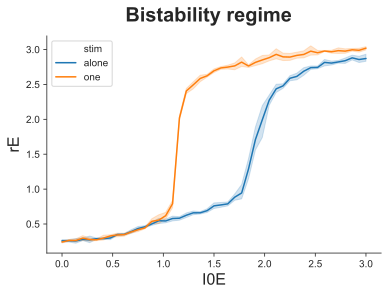

In [33]:
## plot
fig = plt.figure()
fig.set_size_inches(6, 4)
fig.tight_layout()
fig.suptitle('Bistability regime', fontsize=20, x=0.5, weight='demibold')
ax1 = fig.add_subplot(111)
sns.lineplot(ax= ax1, x="I0E", y="rE", hue='stim', data=df)
sns.set_style('white')
plt.xlabel('I0E', fontsize=16)
plt.ylabel('rE', fontsize=16)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.show(block=False)


#df.to_excel('bistability_10.xlsx')